In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import Image
import os, sys

## File size comparison

In [ ]:
def get_info(input_path):
  
  im_names = []
  im_sizes = [] 

  dirs = os.listdir(input_path)

  for item in dirs:
    f, e = os.path.splitext(item) 
    im_names.append(f+'.jpg')
    size = int(os.path.getsize(input_path+item)*0.001)
    im_sizes.append(size)

  df = pd.DataFrame(list(zip(im_names, im_sizes)),columns =['Name', 'Size'])

  return df


### Original

In [ ]:
og_fl = "/content/drive/MyDrive/FloodNet Challenge @ EARTHVISION 2021 - Track 1/Train/Labeled/Flooded/image/" 
og_nfl = "/content/drive/MyDrive/FloodNet Challenge @ EARTHVISION 2021 - Track 1/Train/Labeled/Non-Flooded/image/" 
og_un = '/content/drive/MyDrive/FloodNet Challenge @ EARTHVISION 2021 - Track 1/Train/Unlabeled/image/'

df_og_tr_fl = get_info(og_fl)
df_og_tr_nfl = get_info(og_nfl)
df_og_tr_un = get_info(og_un)

In [ ]:
df_og_tr = pd.concat([df_og_tr_fl, df_og_tr_nfl, df_og_tr_un], ignore_index=True)

In [ ]:
og_test = "/content/drive/MyDrive/FloodNet Challenge @ EARTHVISION 2021 - Track 1/Test/image/" 
df_og_test = get_info(og_test)


In [ ]:
og_val = "/content/drive/MyDrive/FloodNet Challenge @ EARTHVISION 2021 - Track 1/Validation/image/" 
df_og_val = get_info(og_val)

In [ ]:
df_og = pd.concat([df_og_tr, df_og_test, df_og_val], ignore_index=True)
df_og.head()

,Name,Size
0,6279.jpg,5051
1,7463.jpg,6712
2,7325.jpg,6948
3,7587.jpg,7575
4,7202.jpg,5028


### Resized

In [ ]:
rz_fl = "/content/drive/MyDrive/Resized_Images/Train/Labeled/Flooded/" 
rz_nfl = "/content/drive/MyDrive/Resized_Images/Train/Labeled/Non-Flooded/" 
rz_un = '/content/drive/MyDrive/Resized_Images/Train/Unlabeled/'

df_rz_tr_fl = get_info(rz_fl)
df_rz_tr_nfl = get_info(rz_nfl)
df_rz_tr_un = get_info(rz_un)

In [ ]:
df_rz_tr = pd.concat([df_rz_tr_fl, df_rz_tr_nfl, df_rz_tr_un], ignore_index=True)

In [ ]:
rz_test = "/content/drive/MyDrive/Resized_Images/Test/" 
df_rz_test = get_info(rz_test)

In [ ]:
rz_val = "/content/drive/MyDrive/Resized_Images/Validation/" 
df_rz_val = get_info(rz_val)

In [ ]:
len(df_rz_val ) + len(df_rz_test) + len(df_rz_tr) 

2343

In [ ]:
df_rz = pd.concat([df_rz_tr, df_rz_test, df_rz_val], ignore_index=True)
df_rz.head()

,Name,Size
0,6279.jpg,171
1,7463.jpg,93
2,7325.jpg,132
3,7587.jpg,155
4,7202.jpg,185


### AE Images

In [ ]:
ae_fl = "/content/drive/MyDrive/Compressed_AE_images/Train/Labeled/Flooded/" 
ae_nfl = "/content/drive/MyDrive/Compressed_AE_images/Train/Labeled/Non-Flooded/" 
ae_un = '/content/drive/MyDrive/Compressed_AE_images/Train/Unlabeled/'

df_ae_tr_fl = get_info(ae_fl)
df_ae_tr_nfl = get_info(ae_nfl)
df_ae_tr_un = get_info(ae_un)

In [ ]:
df_ae_tr = pd.concat([df_ae_tr_fl, df_ae_tr_nfl, df_ae_tr_un], ignore_index=True)

In [ ]:
ae_test = "/content/drive/MyDrive/Compressed_AE_images/Test/" 
df_ae_test = get_info(ae_test)

In [ ]:
ae_val = "/content/drive/MyDrive/Compressed_AE_images/Validation/" 
df_ae_val = get_info(ae_val)

In [ ]:
len(df_ae_val ) + len(df_ae_test) + len(df_ae_tr) #1897

2343

In [ ]:
df_ae = pd.concat([df_ae_tr, df_ae_test, df_ae_val], ignore_index=True)
df_ae.head()

,Name,Size
0,8408.jpg,52
1,7466.jpg,38
2,7488.jpg,50
3,7273.jpg,23
4,7364.jpg,32


### PCA Images

In [ ]:
pc_fl = "/content/drive/MyDrive/Compressed_PCA_Images/Train/Labeled/Flooded/" 
pc_nfl = "/content/drive/MyDrive/Compressed_PCA_Images/Train/Labeled/Non-Flooded/" 
pc_un = '/content/drive/MyDrive/Compressed_PCA_Images/Train/Unlabeled/'

df_pc_tr_fl = get_info(pc_fl)
df_pc_tr_nfl = get_info(pc_nfl)
df_pc_tr_un = get_info(pc_un)

In [ ]:
df_pc_tr = pd.concat([df_pc_tr_fl, df_pc_tr_nfl, df_pc_tr_un], ignore_index=True)

In [ ]:
pc_test = "/content/drive/MyDrive/Compressed_PCA_Images/Test/" 
df_pc_test = get_info(pc_test)

In [ ]:
pc_val = "/content/drive/MyDrive/Compressed_PCA_Images/Validation/" 
df_pc_val = get_info(pc_val)

In [ ]:
len(df_pc_val ) + len(df_pc_test) + len(df_pc_tr) 

2343

In [ ]:
df_pc = pd.concat([df_pc_tr, df_pc_test, df_pc_val], ignore_index=True)
df_pc.head()

,Name,Size
0,6279.jpg,93
1,7463.jpg,51
2,7325.jpg,75
3,7587.jpg,86
4,7202.jpg,101


### comparison

In [ ]:
df_ae_pc = pd.merge(df_ae, df_pc, on='Name')
df_ae_pc.columns = ['Name', 'Size_AE', 'Size_PCA']
df_ae_pc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2343 entries, 0 to 2342
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Name      2343 non-null   object
 1   Size_AE   2343 non-null   int64 
 2   Size_PCA  2343 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 73.2+ KB


In [ ]:
df_og_rz = pd.merge(df_og, df_rz, on='Name')
df_og_rz.columns = ['Name', 'Size_Org', 'Size_ReS']
df_og_rz.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2343 entries, 0 to 2342
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Name      2343 non-null   object
 1   Size_Org  2343 non-null   int64 
 2   Size_ReS  2343 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 73.2+ KB


In [ ]:
df_all = pd.merge(df_og_rz, df_ae_pc, on='Name')
df_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2343 entries, 0 to 2342
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Name      2343 non-null   object
 1   Size_Org  2343 non-null   int64 
 2   Size_ReS  2343 non-null   int64 
 3   Size_AE   2343 non-null   int64 
 4   Size_PCA  2343 non-null   int64 
dtypes: int64(4), object(1)
memory usage: 109.8+ KB


In [ ]:
df_all.head()

,Name,Size_Org,Size_ReS,Size_AE,Size_PCA
0,6279.jpg,5051,171,52,93
1,7463.jpg,6712,93,36,51
2,7325.jpg,6948,132,55,75
3,7587.jpg,7575,155,58,86
4,7202.jpg,5028,185,54,101


In [ ]:
df_all.describe()

,Size_Org,Size_ReS,Size_AE,Size_PCA
count,2343.000000,2343.000000,2343.000000,2343.000000
mean,5522.048229,133.513444,64.058899,74.399061
std,805.565713,28.398811,14.811250,20.711531
min,4748.000000,43.000000,21.000000,26.000000
25%,5093.500000,116.000000,55.000000,61.000000
50%,5200.000000,131.000000,63.000000,72.000000
75%,5416.000000,156.000000,74.000000,86.000000
max,8425.000000,202.000000,104.000000,153.000000


## SSIM and PSNR

In [ ]:
from math import log10, sqrt
import cv2
import numpy as np
  
def PSNR(original, compressed):
    mse = np.mean((original - compressed) ** 2)
    if(mse == 0):  # MSE is zero means no noise is present in the signal .
                  # Therefore PSNR have no importance.
        return 100
    max_pixel = 255.0
    psnr = 20 * log10(max_pixel / sqrt(mse))
    return psnr
  

In [ ]:
def get_path(input_path):

  dirs = os.listdir(input_path)
  im_path = [input_path+item for item in dirs]

  return im_path

In [ ]:
'''
fld_og = get_path(og_fl)
nfl_og = get_path(og_nfl)
un_og = get_path(og_un)
test_og = get_path(og_test)
val_og = get_path(og_val)

og_paths = fld_og + nfl_og + un_og + test_og + val_og
og_paths = sorted(og_paths, key= lambda item: item.rsplit('/', 1)[-1].rsplit('.', 1)[0], reverse=True)
'''

fld_rz = get_path(rz_fl) 
nfl_rz = get_path(rz_nfl)
un_rz = get_path(rz_un)
test_rz = get_path(rz_test)
val_rz = get_path(rz_val)

rz_paths = fld_rz + nfl_rz + un_rz + test_rz + val_rz
rz_paths = sorted(rz_paths, key= lambda item: item.rsplit('/', 1)[-1].rsplit('.', 1)[0], reverse=True)


fld_ae = get_path(ae_fl)
nfl_ae = get_path(ae_nfl)
un_ae = get_path(ae_un)
test_ae = get_path(ae_test)
val_ae = get_path(ae_val)

ae_paths = fld_ae + nfl_ae + un_ae + test_ae + val_ae
ae_paths = sorted(ae_paths, key= lambda item: item.rsplit('/', 1)[-1].rsplit('.', 1)[0], reverse=True)


fld_pc = get_path(pc_fl)
nfl_pc = get_path(pc_nfl)
un_pc = get_path(pc_un)
test_pc = get_path(pc_test)
val_pc = get_path(pc_val)

pc_paths = fld_pc + nfl_pc + un_pc + test_pc + val_pc
pc_paths = sorted(pc_paths, key= lambda item: item.rsplit('/', 1)[-1].rsplit('.', 1)[0], reverse=True)


**Resize vs AE**

In [ ]:
im_names_rz = [item.rsplit('/', 1)[-1].rsplit('.', 1)[0] for item in rz_paths]

psnr_values_ae = []

for org, com in zip(rz_paths, ae_paths):
  original = cv2.imread(org)
  compressed = cv2.imread(com, 1) 
  value = PSNR(original, compressed)
  psnr_values_ae.append(value)



In [ ]:
ssim_values_ae = []

from skimage.metrics import structural_similarity as ssim
from skimage.io import imread 

for ind, im in enumerate(zip(rz_paths, ae_paths)):

  original = cv2.cvtColor(imread(im[0]), cv2.COLOR_BGR2GRAY)
  compressed = cv2.cvtColor(imread(im[1]), cv2.COLOR_BGR2GRAY)

  score = ssim(original, compressed)
  ssim_values_ae.append(score)

In [ ]:
df_rz_ae_ssim = pd.DataFrame(list(zip(im_names_rz, ssim_values_ae, psnr_values_ae)),columns =['Name', 'SSIM_AE', 'PSNR_AE'])
df_rz_ae_ssim.head(5)

,Name,SSIM_AE,PSNR_AE
0,9925,0.814557,29.233531
1,9924,0.806789,28.627960
2,9923,0.815187,28.779063
3,9898,0.856201,28.549830
4,9897,0.842697,28.436803


**Resize vs PCA**

In [ ]:
psnr_values_pc = []

for ind, im in enumerate(zip(rz_paths, pc_paths)):

  if ind%200==0:
    print(ind)

  original = cv2.imread(im[0])
  compressed = cv2.imread(im[1], 1) 
  value = PSNR(original, compressed)
  psnr_values_pc.append(value)


In [ ]:
ssim_values_pc = []

for ind, im in enumerate(zip(rz_paths, pc_paths)):

  if ind%200==0:
    print(ind)

  original = cv2.cvtColor(imread(im[0]), cv2.COLOR_BGR2GRAY)
  compressed = cv2.cvtColor(imread(im[1]), cv2.COLOR_BGR2GRAY)

  score = ssim(original, compressed)
  ssim_values_pc.append(score)

In [ ]:
df_rz_pc_ssim = pd.DataFrame(list(zip(im_names_rz, ssim_values_pc, psnr_values_pc)),columns =['Name', 'SSIM_PCA', 'PSNR_PCA'])

In [ ]:
df_rz_ae_ssim.head(5)

,Name,SSIM_AE,PSNR_AE
0,9925,0.814557,29.233531
1,9924,0.806789,28.627960
2,9923,0.815187,28.779063
3,9898,0.856201,28.549830
4,9897,0.842697,28.436803


In [ ]:
df_ss_psnr = pd.merge(df_rz_pc_ssim, df_rz_ae_ssim, on='Name')
df_ss_psnr.Name  = df_ss_psnr.Name.apply(lambda x: x+'.jpg')
 
column_names = ['Name', 'SSIM_PCA', 'SSIM_AE', 'PSNR_PCA', 'PSNR_AE']
df_ss_psnr = df_ss_psnr.reindex(columns=column_names)

In [ ]:
df_ss_psnr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2343 entries, 0 to 2342
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      2343 non-null   object 
 1   SSIM_PCA  2343 non-null   float64
 2   SSIM_AE   2343 non-null   float64
 3   PSNR_PCA  2343 non-null   float64
 4   PSNR_AE   2343 non-null   float64
dtypes: float64(4), object(1)
memory usage: 109.8+ KB


In [ ]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2343 entries, 0 to 2342
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Name      2343 non-null   object
 1   Size_Org  2343 non-null   int64 
 2   Size_ReS  2343 non-null   int64 
 3   Size_AE   2343 non-null   int64 
 4   Size_PCA  2343 non-null   int64 
dtypes: int64(4), object(1)
memory usage: 109.8+ KB


In [ ]:
final_df = pd.merge(df_all, df_ss_psnr, on='Name')

In [ ]:
final_df.head()

,Name,Size_Org,Size_ReS,Size_AE,Size_PCA,SSIM_PCA,SSIM_AE,PSNR_PCA,PSNR_AE
0,6279.jpg,5051,171,52,93,0.910123,0.615186,31.722294,29.361286
1,7463.jpg,6712,93,36,51,0.961672,0.847323,33.627519,28.027988
2,7325.jpg,6948,132,55,75,0.958116,0.813841,34.804604,30.287866
3,7587.jpg,7575,155,58,86,0.935974,0.740956,33.082295,29.541153
4,7202.jpg,5028,185,54,101,0.924016,0.605827,31.215350,28.198424


In [ ]:
output_path = '/content/drive/MyDrive/image_comp_results.csv'
final_df.to_csv(output_path)

# EDA on Image results

In [5]:
path = '/content/drive/MyDrive/Floodnet_Project/image_comp_results.csv'
df = pd.read_csv(path)

In [6]:
df.drop(['Unnamed: 0'], axis=1, inplace=True)
df.head()

,Name,Size_Org,Size_ReS,Size_AE,Size_PCA,SSIM_PCA,SSIM_AE,PSNR_PCA,PSNR_AE
0,6279.jpg,5051,171,52,93,0.910123,0.615186,31.722294,29.361286
1,7463.jpg,6712,93,36,51,0.961672,0.847323,33.627519,28.027988
2,7325.jpg,6948,132,55,75,0.958116,0.813841,34.804604,30.287866
3,7587.jpg,7575,155,58,86,0.935974,0.740956,33.082295,29.541153
4,7202.jpg,5028,185,54,101,0.924016,0.605827,31.215350,28.198424


In [7]:
df_des = df.describe()

In [8]:
df_des

,Size_Org,Size_ReS,Size_AE,Size_PCA,SSIM_PCA,SSIM_AE,PSNR_PCA,PSNR_AE
count,2343.000000,2343.000000,2343.000000,2343.000000,2343.000000,2343.000000,2343.000000,2343.000000
mean,5522.048229,133.513444,64.058899,74.399061,0.893815,0.815063,32.508156,29.231964
std,805.565713,28.398811,14.811250,20.711531,0.054578,0.063394,2.564812,1.247831
min,4748.000000,43.000000,21.000000,26.000000,0.587911,0.531083,27.208842,27.140750
25%,5093.500000,116.000000,55.000000,61.000000,0.885156,0.784142,31.334976,28.223985
50%,5200.000000,131.000000,63.000000,72.000000,0.903169,0.821789,33.036096,29.193482
75%,5416.000000,156.000000,74.000000,86.000000,0.920636,0.853346,34.211824,30.042704
max,8425.000000,202.000000,104.000000,153.000000,0.976924,0.959505,39.797636,34.358321


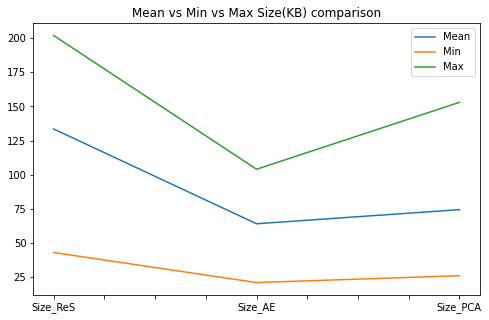

In [9]:
# Mean size of each image type
fig, ax = plt.subplots(figsize=(8,5))
ax.set_title('Mean vs Min vs Max Size(KB) comparison')
df_des.iloc[1][1:4].plot()
df_des.iloc[3][1:4].plot()
df_des.iloc[7][1:4].plot()
ax.legend(['Mean', 'Min', 'Max'], loc='best')
plt.show()


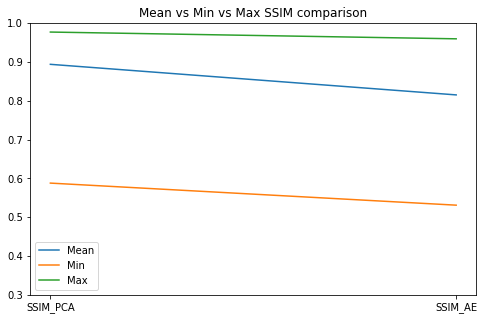

In [10]:
fig, ax = plt.subplots(figsize=(8,5))
ax.set_title('Mean vs Min vs Max SSIM comparison')
for x in [1,3,7]:
  data1=[i for i in df_des.iloc[x][4:6].index]
  data2=[i for i in df_des.iloc[x][4:6]]
  plt.plot(data1, data2)


plt.ylim(0.3, 1)
ax.legend(['Mean', 'Min', 'Max'], loc='best')


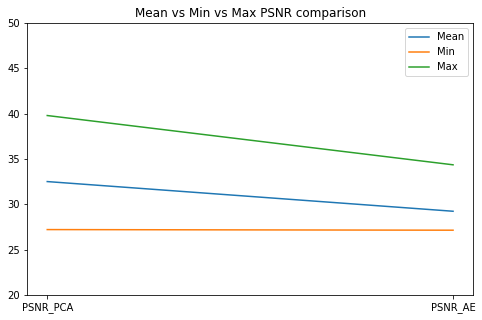

In [11]:
fig, ax = plt.subplots(figsize=(8,5))
ax.set_title('Mean vs Min vs Max PSNR comparison')
for x in [1,3,7]:
  data1=[i for i in df_des.iloc[x][6:].index]
  data2=[i for i in df_des.iloc[x][6:]]
  plt.plot(data1, data2)


plt.ylim(20, 50)
ax.legend(['Mean', 'Min', 'Max'], loc='best')
